In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
path = "/Users/raaghav/Desktop/ML_projects/Melbourne_Min_Temp_Analysis/Data/processed/melbourne_temp_clean.csv"
df = pd.read_csv(path)

In [13]:
df.head()
df.shape


(3650, 2)

In [5]:
df.isna().sum()

Date        0
min_temp    0
dtype: int64

## PLOTS: Rolling Mean , Rolling Standard Deviation, ACF(Autocorrelation Factor)

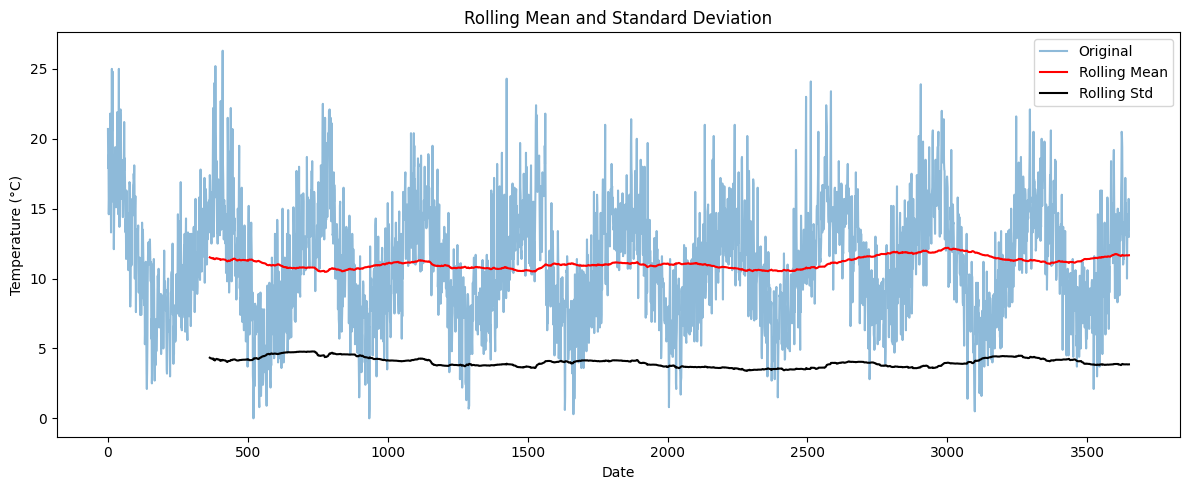

Relatively smooth rolling mean and standard deviation --> apart from seasonality the data is pretty similar in a span of one year


In [6]:
# Rolling mean
rolling_mean = df['min_temp'].rolling(window=365).mean()
rolling_std = df['min_temp'].rolling(window=365).std()

plt.figure(figsize=(12, 5))
plt.plot(df['min_temp'], label='Original', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()
print("Relatively smooth rolling mean and standard deviation --> apart from seasonality the data is pretty similar in a span of one year")

### The non-stationarity in purely seasonal 

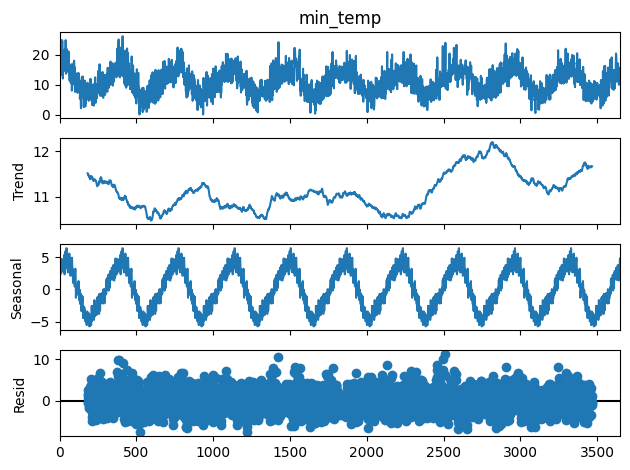

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['min_temp'], model='additive', period=365)
decomposition.plot()
plt.tight_layout()
plt.show()

In [8]:
rolling_mean

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3645    11.651507
3646    11.656712
3647    11.665205
3648    11.668767
3649    11.669589
Name: min_temp, Length: 3650, dtype: float64

### Quantitative check for stationarity (Augmented Dicky-Fuller Test)

In [9]:
from statsmodels.tsa.stattools import adfuller
def adf(my_df):
    res = adfuller(df['min_temp'])
    print("ADF Statistic: ", res[0])
    print("p-value: ",res[1])
    print("Critical Values:  ")
    for key,val in res[4].items():
        print("\t",key,": ",val)


In [12]:
adf(df)
print("Since p-value<<0.05, the data can be considered stationary ")

ADF Statistic:  -4.440522006557912
p-value:  0.0002514723602033768
Critical Values:  
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842
Since p-value<<0.05, the data can be considered stationary 


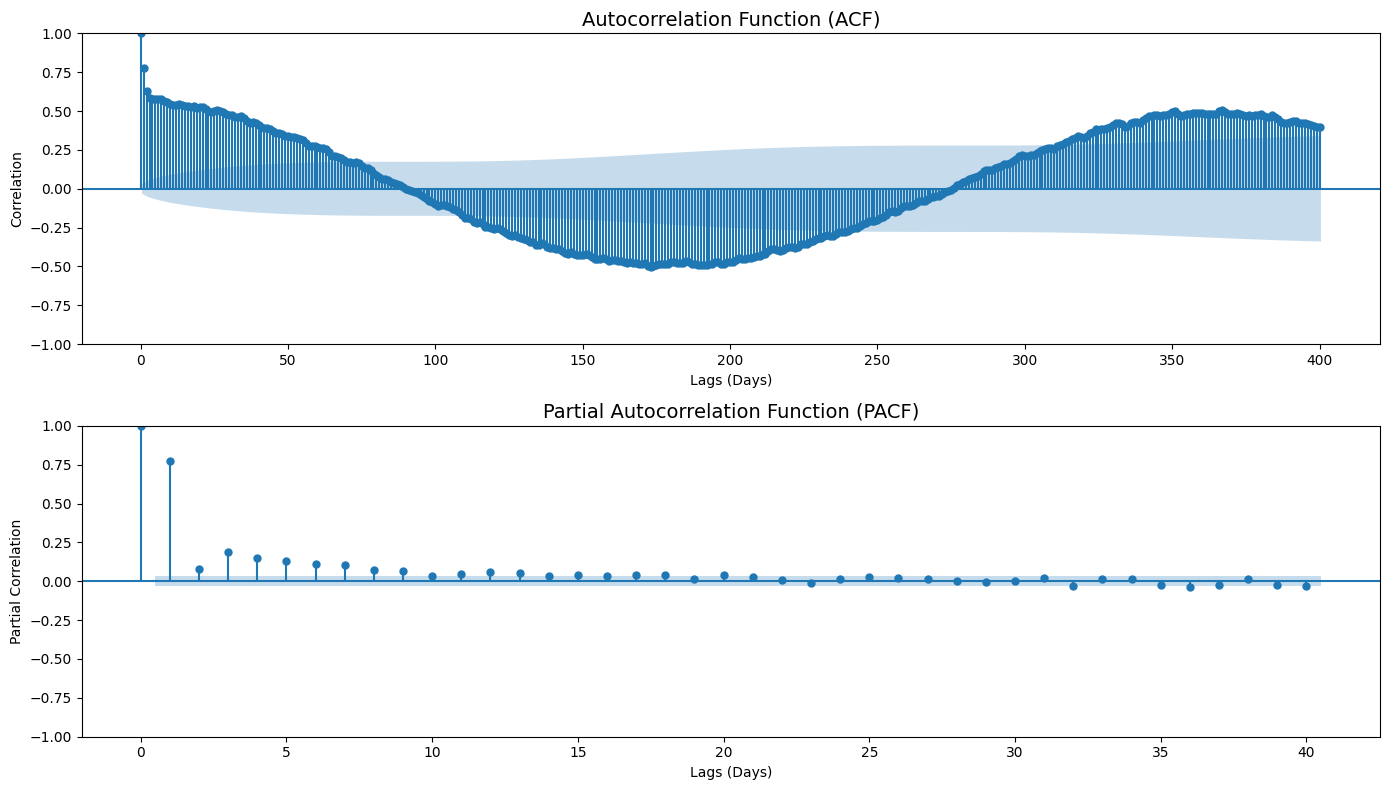

This further proves the seasonality of the data 


In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(df['min_temp'], lags=400, alpha=0.05, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)', fontsize=14)
axes[0].set_xlabel('Lags (Days)')
axes[0].set_ylabel('Correlation')
plot_pacf(df['min_temp'], lags=40, alpha=0.05, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
axes[1].set_xlabel('Lags (Days)')
axes[1].set_ylabel('Partial Correlation')

plt.tight_layout()
plt.savefig('acf_pacf_plot.png', dpi=150)
plt.show()
print("This further proves the seasonality of the data ")

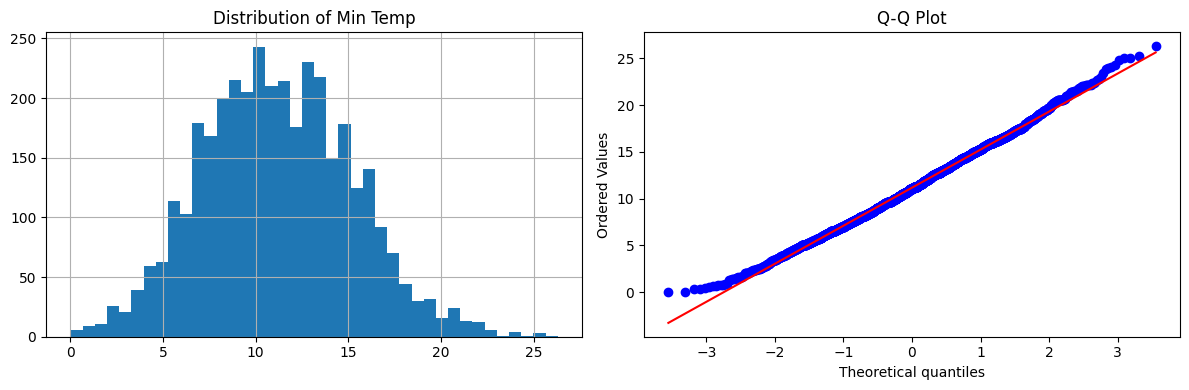

The temperature values are distributed approximately normal


In [16]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['min_temp'].hist(bins=40)
plt.title('Distribution of Min Temp')

plt.subplot(1,2,2)
from scipy import stats
stats.probplot(df['min_temp'], plot=plt)
plt.title('Q-Q Plot')
plt.tight_layout()
plt.show()
print("The temperature values are distributed approximately normal")